# **Simple Linear Regression**

### **What is Simple Linear Regression:**

Simple linear regression is used to model the relationship between one dependent variable (also known as target) and one independent variables (also referred as feature).
<br />

### **Why use Linear Regression:**

Simple linear regression is a statistical method easy to implement and extend for a multivariate case.
<br />

### **How to implement it:**

#### **The Model:**
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

- $x$ is known as feature.
- $y$ is known as target.
- $i$ stands for the $i^{(th)}$ training sample.
- $w$ is the the line inclination.
- $b$ is the bias.

<br />

#### **The Cost function:**

$$J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1}(f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{2}$$

- $x^{(i)}$ is the $i^{(th)}$ feature sample of the trainning set.
- $y^{(i)}$ is the $i^{(th)}$ target of the training set.

<br/>

#### **The the Gradient:**

\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{3}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{4}\\
\end{align}

\begin{align}
w = w - \alpha \frac{\partial J(w,b)}{\partial w} \tag{5}\\
b = b - \alpha \frac{\partial J(w,b)}{\partial b} \tag{6}\\
\end{align}

**Conventions:**
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

In [46]:
# import the necessary pkgs:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [47]:
#  guarantee repeatability:
np.random.seed(42)

x_train = np.random.uniform(1, 5, 100)
y_train = 2.5 * x_train + 100

noise = np.random.normal(loc=0.0, scale=1, size=y_train.shape)
y_train = y_train + noise

# print(f"x_train = {x_train}, x_train.sphape = {x_train.shape} {type(x_train)}")
# print(f"y_train = {y_train}, y_train.sphape = {y_train.shape} {type(y_train)}")

#### **Simple Linear Regression:**
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In [48]:
# implementation
def model(x,w,b):
    """
    Description: This function implements the linear model used for Linear Regression
    -----------
    Params:
    ------
        x (numpy.ndarray)   : the feature array with m samples 
        w (scalar)          : the weight for the feature
        b (scalar)          : the bias
    Returns:
    -------
        f_wb (numpy.ndarray): the calculated predicted target 
    """
    m = x.shape[0]
    f_wb = np.zeros(m)

    for i in range(m):
        f_wb[i] = w * x[i] + b
    
    return f_wb

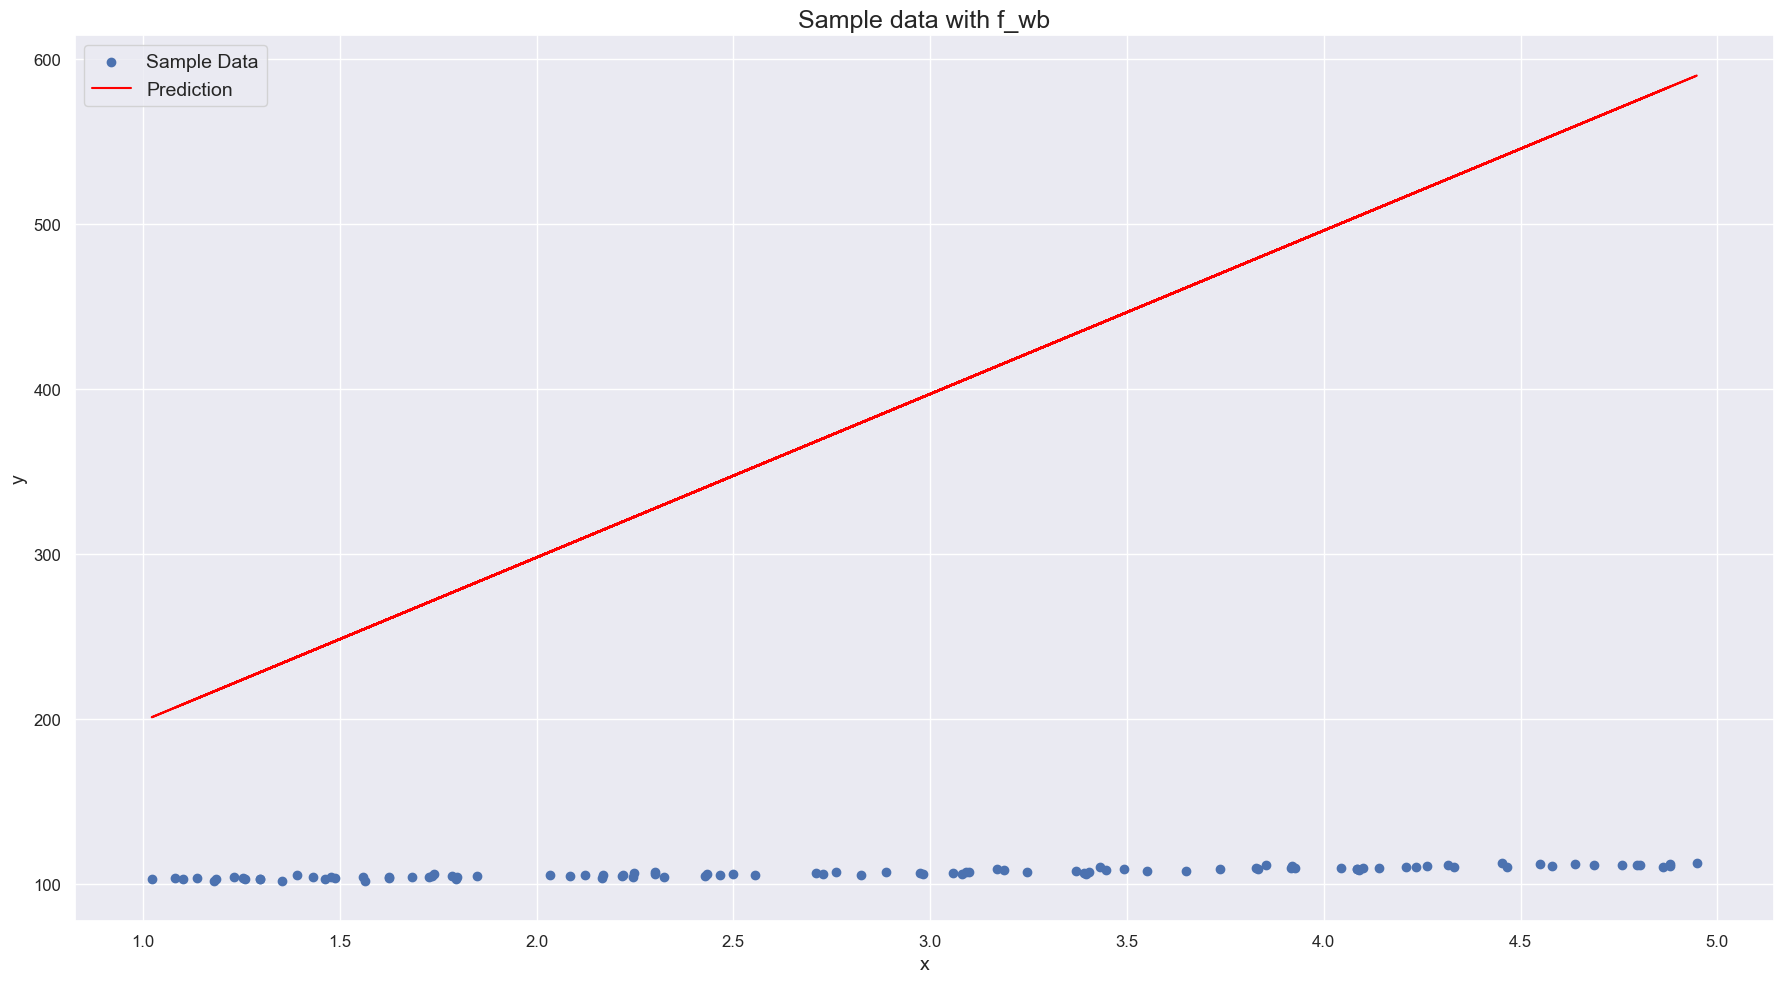

In [49]:
# scatter and other plots:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

title_fontsize = 18
label_fontsize = 14
tick_fontsize = 12
legend_fontsize = 14

ax.set_title('Sample data with f_wb', fontsize=title_fontsize)
ax.set_xlabel('x', fontsize=label_fontsize)
ax.set_ylabel('y', fontsize=label_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax.scatter(x_train, y_train, label='Sample Data')
ax.plot(x_train, f_wb, label='Prediction', color="red")
ax.legend(fontsize=legend_fontsize)

plt.tight_layout()
plt.show()

#### **How to implement Cost function:**

$$J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1}(f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{2}$$

extended version:

$$J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1}((wx^{(i)} + b) - y^{(i)})^2$$


In [50]:
# implementation
def cost(x,y,w,b):
    """
    Description: This function implements calculated cost
    -----------
    Params:
    ------
        x (numpy.ndarray)   : the feature array with m samples 
        y (numpy.ndarray)   : the target array with m samples
        w (scalar)          : the weight for the feature
        b (scalar)          : the bias
    Returns:
    -------
        cost (numpy.ndarray): the calculated total cost 
    """
    m = x.shape[0]
    cost = 0

    for i in range(m):        
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    cost = (1 / 2 * m) * cost 
    return cost

J_wb = 83084.34689203724, J_wb.sphape = () <class 'numpy.float64'>


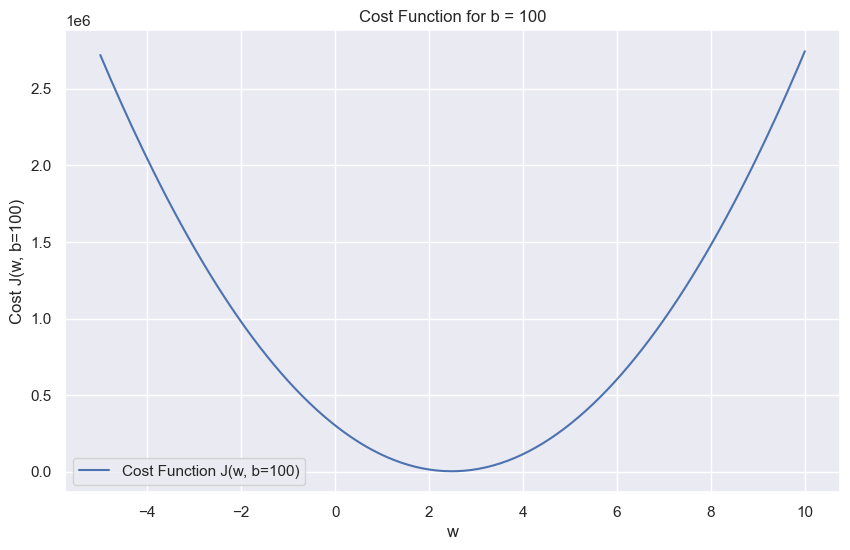

In [51]:
J_wb = cost(x_train, y_train, w=0, b=110)

print(f"J_wb = {J_wb}, J_wb.sphape = {J_wb.shape} {type(J_wb)}")

w_values = np.linspace(-5, 10, 200)
b = 100
cost_values = [cost(x_train, y_train, w, b) for w in w_values]

plt.figure(figsize=(10, 6))
plt.plot(w_values, cost_values, label='Cost Function J(w, b=100)')
plt.xlabel('w')
plt.ylabel('Cost J(w, b=100)')
plt.title('Cost Function for b = 100')
plt.legend()
plt.grid(True)
plt.show()

#### **How to implement the Gradient:**

\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}




In [52]:
# implementation
def gradient(x,y,w,b):
    """
    Description: This function implements derivatives for w and b
    -----------
    Params:
    ------
        x (numpy.ndarray)    : the feature array with m samples 
        y (numpy.ndarray)    : the target array with m samples
        w (scalar)           : the weight for the feature
        b (scalar)           : the bias
    Returns:
    -------
        dj_dw (numpy.ndarray): the calculated partial derivative in respect to w
        dj_db (numpy.ndarray): the calculated partial derivative in respect to b
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        diff = f_wb - y[i]
        dj_dw = dj_dw + diff * x[i]
        dj_db = dj_db + diff
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db

    return dj_dw, dj_db


In [53]:
dj_dw, dj_db = gradient(x_train,y_train,0,110)

# print(f"dj_dw = {dj_dw}, dj_dw.sphape = {dj_dw.shape} {type(dj_dw)}")
# print(f"dj_db = {dj_db}, dj_db.sphape = {dj_db.shape} {type(dj_db)}")

#### **How to implement the Gradient Descent:**


\begin{align}
w = w - \alpha \frac{\partial J(w,b)}{\partial w}  \tag{6}\\
b = b - \alpha \frac{\partial J(w,b)}{\partial b}   \tag{7}\\
\end{align}

In [54]:
# implementation
def gradient_descent(x,y,w,b,epochs,alpha,cost,gradient):
    """
    Description: This function implements the gradient descent
    -----------
    Params:
    ------
        x (numpy.ndarray)    : the feature array with m samples 
        y (numpy.ndarray)    : the target array with m samples
        w (scalar)           : the weight for the feature
        b (scalar)           : the bias
        epochs (scalar)      : total numbe of iterations
        alpha (scalar)       : learning rate
        cost (function)      : the cost function implemented
        gradient (function)  : the cost function implemented
    Returns:
    -------
        w (scalar)        : the optimal value for w
        b (scalar)        : the the optimal value for b
        w_hist (array)    : an array containing the w parameter history
        b_hist (array)    : an array containing the b parameter history
        J_wb_hist (array) : an array containing the cost function history
        
    """
    m = x.shape[0]

    w_hist = []
    b_hist = []
    J_wb_hist = []

    for i in range(epochs):
        dj_dw, dj_db = gradient(x,y,w,b)
        
        w = w - alpha * dj_dw 
        b = b - alpha * dj_db

        J_wb_hist.append(cost(x,y,w,b))
        w_hist.append(w)
        b_hist.append(b)
        
    return w, b, w_hist, b_hist, J_wb_hist


In [55]:
w = 0
b = 0
epochs = 10000
alpha = 0.01
w, b, w_hist, b_hist, J_wb_hist = gradient_descent(x_train,y_train,w,b,epochs,alpha,cost,gradient)

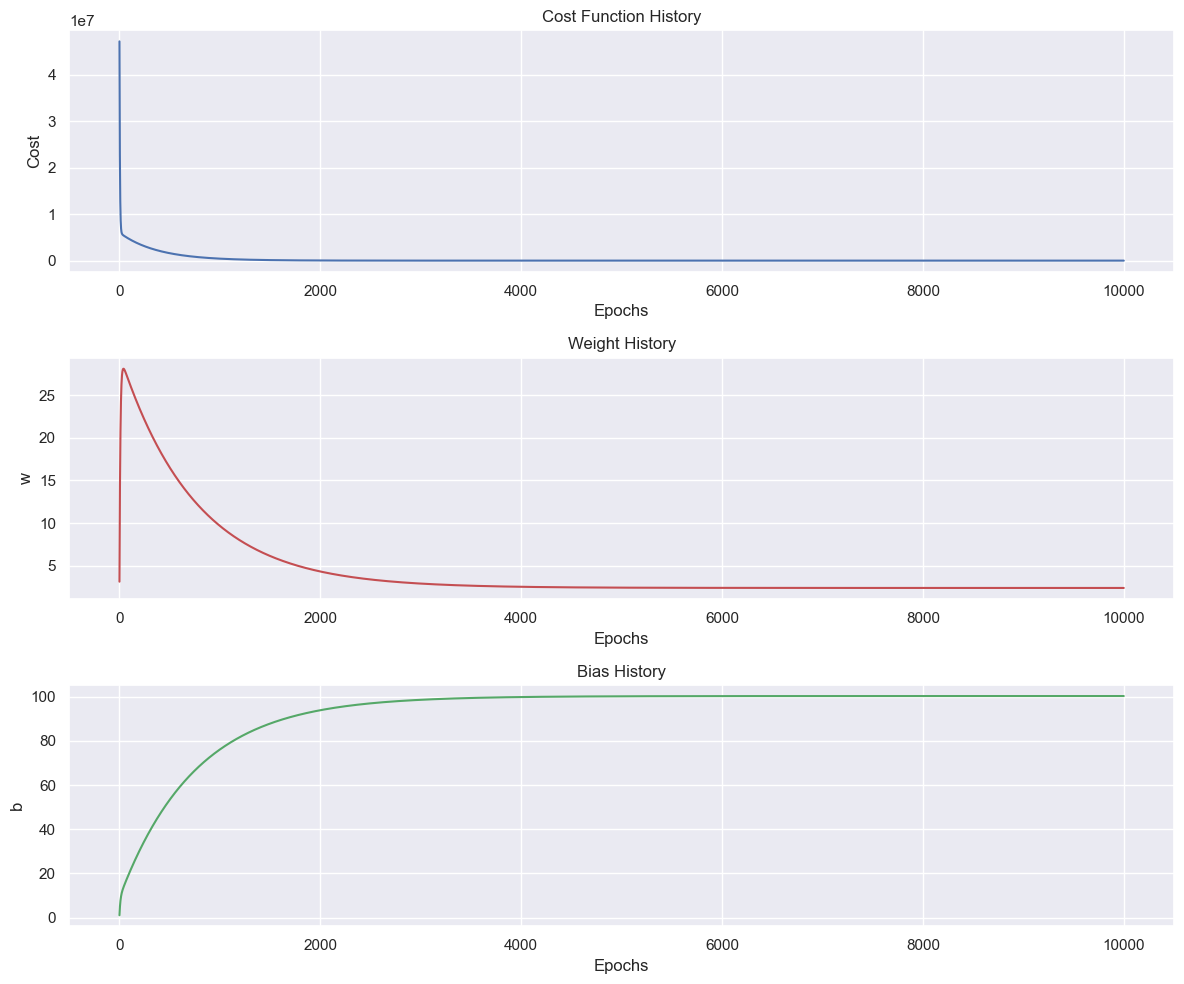

In [58]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# plotting cost function history:
axs[0].plot(range(epochs), J_wb_hist, 'b')
axs[0].set_title('Cost Function History')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Cost')

# plotting weight history
axs[1].plot(range(epochs), w_hist, 'r')
axs[1].set_title('Weight History')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('w')

# plotting bias history
axs[2].plot(range(epochs), b_hist, 'g')
axs[2].set_title('Bias History')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('b')

plt.tight_layout()
plt.show()

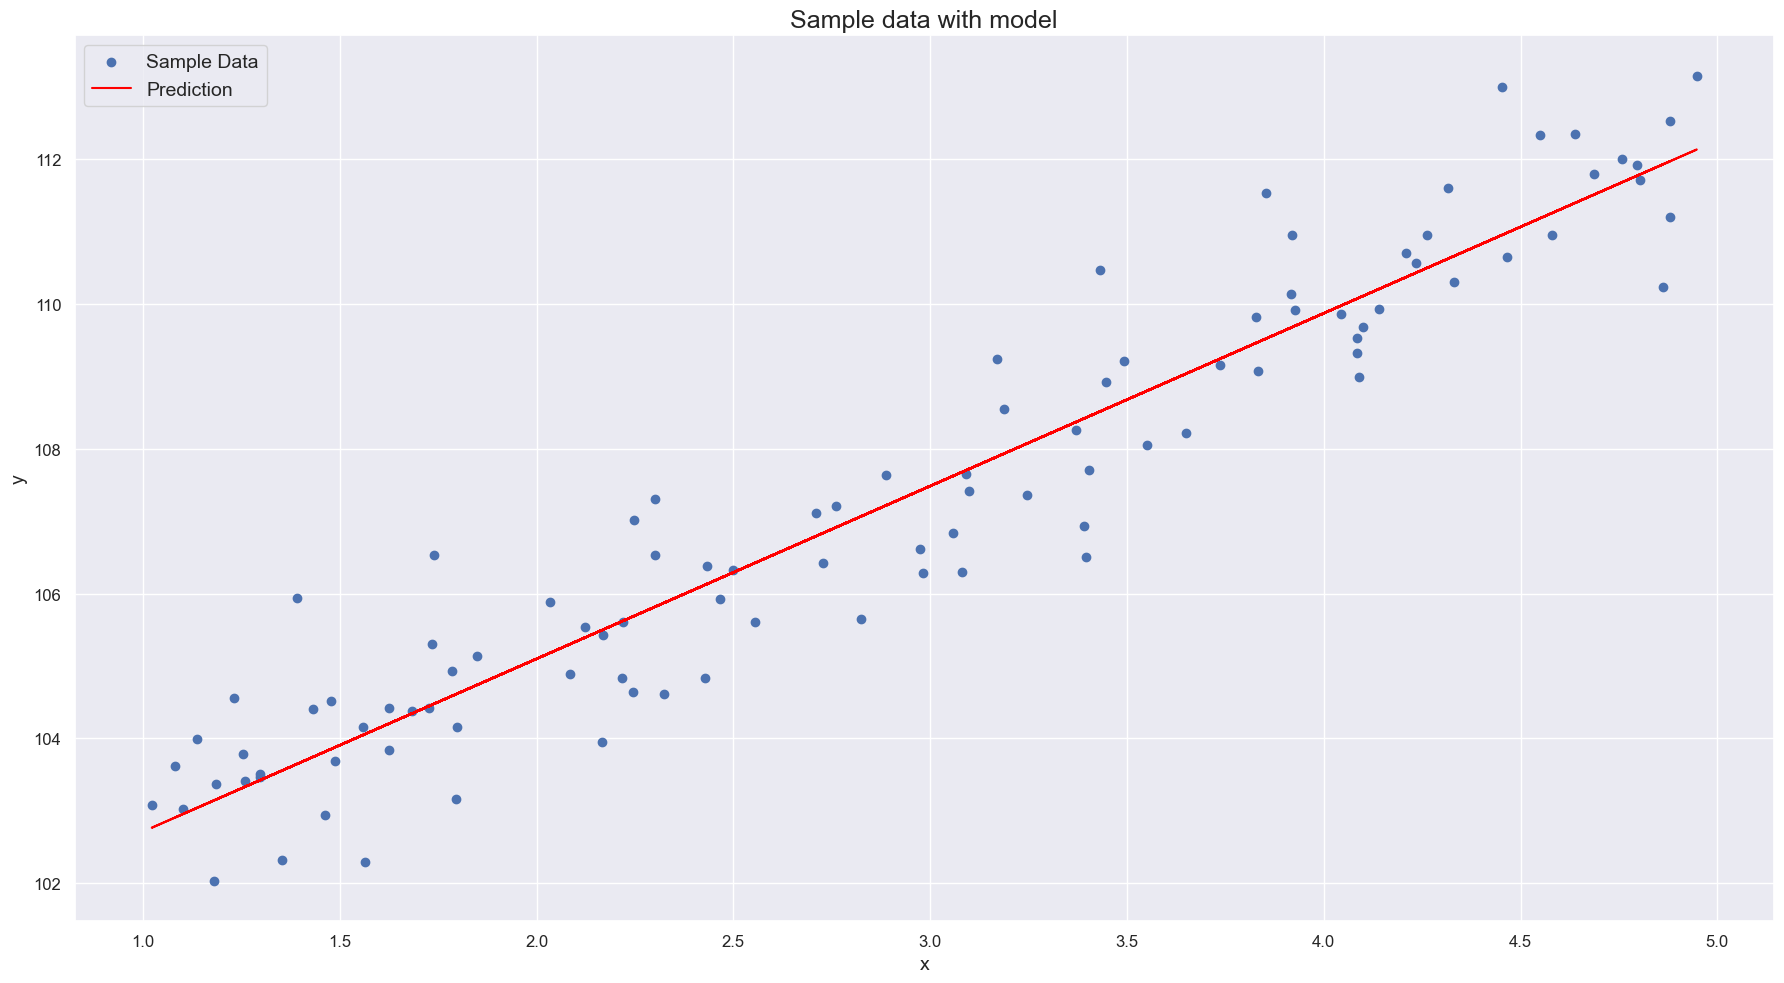

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

title_fontsize = 18
label_fontsize = 14
tick_fontsize = 12
legend_fontsize = 14

f_wb = model(x_train, w, b)

ax.set_title('Sample data with model', fontsize=title_fontsize)
ax.set_xlabel('x', fontsize=label_fontsize)
ax.set_ylabel('y', fontsize=label_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax.scatter(x_train, y_train, label='Sample Data')
ax.plot(x_train, f_wb, label='Prediction', color="red")
ax.legend(fontsize=legend_fontsize)

plt.tight_layout()
plt.show()